In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [60]:
colunm_names = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
'''
可调参数
'''

# KNNImputer
n_neighbors = 5

# 数据预处理

In [61]:
train_DataFrame = pd.read_csv(filepath_or_buffer="Data/Titanic/train.csv", 
                    names=["PassengerId", "Survived", "Pclass", "Name", "Sex", "Age", 
                    "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"], skiprows=1)
test_DataFrame = pd.read_csv(filepath_or_buffer="Data/Titanic/test.csv", 
                    names=["PassengerId", "Pclass", "Name", "Sex", "Age", 
                    "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"], skiprows=1)
test_AnswerDataFrame = pd.read_csv(filepath_or_buffer="Data/Titanic/gender_submission.csv",
                    names=["PassengerId", "Survived"], skiprows=1)

print(train_DataFrame)
print(test_DataFrame)
print(test_AnswerDataFrame)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [62]:
def EncodeData(x: pd.DataFrame) -> list:
    """
    对特征向量进行编码
    将pandas的DataFrame结构转换为list
    同时去除无关列
    :param x: pandas.DataFrame
    :return: 特征向量
    """
    input_data = [[x["Pclass"][i], x["Sex"][i], x["Age"][i], x["SibSp"][i], x["Parch"][i], x["Fare"][i], x["Embarked"][i]] for i in range(len(x))]
    
    return input_data

class PreEncodeData:
    def __init__(self, x: pd.DataFrame) -> pd.DataFrame:
        """
        对输入数据进行预编码
        :param x: pandas.DataFrame 类型数据，为读取的数据
        :return: pandas.DataFrame 编码后的数据
        """
        for i in range(len(x["Sex"])):
            if x["Sex"][i] == 'male':
                x.loc[i, "Sex"] = 1
            elif x["Sex"][i] == 'female':
                x.loc[i, "Sex"] = 0
        
        for i in range(len(x["Embarked"])):
            if x["Embarked"][i] == 'C':
                x.loc[i, "Embarked"] = 0
            elif x["Embarked"][i] == 'Q':
                x.loc[i, "Embarked"] = 1
            elif x["Embarked"][i] == 'S':
                x.loc[i, "Embarked"] = 2
        x = x.drop(columns=["Name", "Ticket", "Cabin"])
        self.MinMax = MinMaxScalerStrategy(x)

    
    def PreEncode(self, x: pd.DataFrame) -> pd.DataFrame:
        """
        对再次输入数据进行预编码
        如将测试集数据进行与训练集相同的编码方式

        :param x: pandas.DataFrame 类型数据，为读取的数据
        :return: pandas.DataFrame 编码后的数据
        """
        for i in range(len(x["Sex"])):
            if x["Sex"][i] == 'male':
                x.loc[i, "Sex"] = 1
            elif x["Sex"][i] == 'female':
                x.loc[i, "Sex"] = 0
        
        for i in range(len(x["Embarked"])):
            if x["Embarked"][i] == 'C':
                x.loc[i, "Embarked"] = 0
            elif x["Embarked"][i] == 'Q':
                x.loc[i, "Embarked"] = 1
            elif x["Embarked"][i] == 'S':
                x.loc[i, "Embarked"] = 2
        x = x.drop(columns=["Name", "Ticket", "Cabin"])
        x = self.MinMax.transform(x)
        return x

def EncodeTrainData(x: pd.DataFrame) -> tuple[list, list]:
    """
    对测试集进行编码处理
    将pandas的DataFrame结构转换为list
    同时去除无关列
    :param x: pandas.DataFrame
    :return: 特征向量，标签向量
    """
    input_data = EncodeData(x)
    label = [x["Survived"][i] for i in range(len(x))]

    return input_data, label

In [63]:
class MinMaxScalerStrategy:
    def __init__(self, data: pd.DataFrame):
        self.data = data
        self.min = {
            "Pclass": data["Pclass"].min(),
            "Sex": data["Sex"].min(),
            "Age": data["Age"].min(),
            "SibSp": data["SibSp"].min(),
            "Parch": data["Parch"].min(),
            "Fare": data["Fare"].min(),
            "Embarked": data["Embarked"].min()
        }
        self.max = {
            "Pclass": data["Pclass"].max(),
            "Sex": data["Sex"].max(),
            "Age": data["Age"].max(),
            "SibSp": data["SibSp"].max(),
            "Parch": data["Parch"].max(),
            "Fare": data["Fare"].max(),
            "Embarked": data["Embarked"].max()
        }
        def inner_transform(data: pd.DataFrame) -> pd.DataFrame:
            colunm_names = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
            for name in colunm_names:
                for i in range(len(data[name])):
                    data.loc[i, name] = (data[name][i] - self.min[name]) / (self.max[name] - self.min[name])
            return data
        self.data = inner_transform(self.data)

    def transform(self, data: pd.DataFrame) -> pd.DataFrame:
        colunm_names = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
        for name in colunm_names:
            for i in range(len(data[name])):
                data.loc[i, name] = (data[name][i] - self.min[name]) / (self.max[name] - self.min[name])
        return data

## 缺省值处理

In [64]:
imputer = KNNImputer(n_neighbors=n_neighbors, weights="distance", copy=False)

# 训练集编码
EncodeModel = PreEncodeData(train_DataFrame)

print("train_DataFrame:")
train_DataFrame = EncodeModel.PreEncode(train_DataFrame)
print(train_DataFrame)

# 测试集编码
print("test_DataFrame:")
test_DataFrame = EncodeModel.PreEncode(test_DataFrame)
print(test_DataFrame)

# 缺失值填充
print("train_DataFrame_filled:")
train_DataFrame_filled = pd.DataFrame(imputer.fit_transform(train_DataFrame), columns=train_DataFrame.columns)
print(train_DataFrame_filled)

print("test_DataFrame_filled:")
test_DataFrame_filled = pd.DataFrame(imputer.fit_transform(test_DataFrame), columns=test_DataFrame.columns)
print(test_DataFrame_filled)

/var/folders/f7/bxkzrv1163j5s267jpydb0_m0000gn/T/ipykernel_36894/61344741.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i, name] = (data[name][i] - self.min[name]) / (self.max[name] - self.min[name])
/var/folders/f7/bxkzrv1163j5s267jpydb0_m0000gn/T/ipykernel_36894/61344741.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i, name] = (data[name][i] - self.min[name]) / (self.max[name] - self.min[name])
/var/folders/f7/bxkzrv1163j5s267jpydb0_m0000gn/T/ipykernel_36894/61344741.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.

train_DataFrame:


/var/folders/f7/bxkzrv1163j5s267jpydb0_m0000gn/T/ipykernel_36894/61344741.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i, name] = (data[name][i] - self.min[name]) / (self.max[name] - self.min[name])
/var/folders/f7/bxkzrv1163j5s267jpydb0_m0000gn/T/ipykernel_36894/61344741.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i, name] = (data[name][i] - self.min[name]) / (self.max[name] - self.min[name])
/var/folders/f7/bxkzrv1163j5s267jpydb0_m0000gn/T/ipykernel_36894/61344741.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.

     PassengerId  Survived  Pclass  Sex       Age  SibSp     Parch      Fare  \
0              1         0     1.0  1.0  0.271174  0.125  0.000000  0.014151   
1              2         1     0.0  0.0  0.472229  0.125  0.000000  0.139136   
2              3         1     1.0  0.0  0.321438  0.000  0.000000  0.015469   
3              4         1     0.0  0.0  0.434531  0.125  0.000000  0.103644   
4              5         0     1.0  1.0  0.434531  0.000  0.000000  0.015713   
..           ...       ...     ...  ...       ...    ...       ...       ...   
886          887         0     0.5  1.0  0.334004  0.000  0.000000  0.025374   
887          888         1     0.0  0.0  0.233476  0.000  0.000000  0.058556   
888          889         0     1.0  0.0       NaN  0.125  0.333333  0.045771   
889          890         1     0.0  1.0  0.321438  0.000  0.000000  0.058556   
890          891         0     1.0  1.0  0.396833  0.000  0.000000  0.015127   

    Embarked  
0        1.0  
1        

/var/folders/f7/bxkzrv1163j5s267jpydb0_m0000gn/T/ipykernel_36894/61344741.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i, name] = (data[name][i] - self.min[name]) / (self.max[name] - self.min[name])
/var/folders/f7/bxkzrv1163j5s267jpydb0_m0000gn/T/ipykernel_36894/61344741.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i, name] = (data[name][i] - self.min[name]) / (self.max[name] - self.min[name])
/var/folders/f7/bxkzrv1163j5s267jpydb0_m0000gn/T/ipykernel_36894/61344741.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.

## 训练数据集

In [65]:
print("train_dataset:")
train_dataset = EncodeData(train_DataFrame_filled)
print(train_dataset)

print("test_dataset:")
test_dataset = EncodeData(test_DataFrame_filled)
print(test_dataset)

train_label = [train_DataFrame_filled["Survived"][i] for i in range(len(train_DataFrame_filled))]
test_label = [test_AnswerDataFrame["Survived"][i] for i in range(len(test_AnswerDataFrame))]

train_dataset:
[[1.0, 1.0, 0.2711736617240513, 0.125, 0.0, 0.014151057562208049, 1.0], [0.0, 0.0, 0.4722292033174164, 0.125, 0.0, 0.13913573538264068, 0.0], [1.0, 0.0, 0.32143754712239253, 0.0, 0.0, 0.015468569817999833, 1.0], [0.0, 0.0, 0.43453128926866047, 0.125, 0.0, 0.10364429745562033, 1.0], [1.0, 1.0, 0.43453128926866047, 0.0, 0.0, 0.015712553569072387, 1.0], [1.0, 1.0, 0.4078862630501446, 0.0, 0.0, 0.01650950209357577, 0.5], [0.0, 1.0, 0.6732847449107816, 0.0, 0.0, 0.10122885832000206, 1.0], [1.0, 1.0, 0.01985423473234481, 0.375, 0.16666666666666666, 0.04113566043083236, 1.0], [1.0, 0.0, 0.33400351847197784, 0.0, 0.3333333333333333, 0.021730754366528396, 1.0], [0.5, 0.0, 0.17064589092736868, 0.125, 0.0, 0.058694292654020104, 0.0], [1.0, 0.0, 0.04498617743151546, 0.125, 0.16666666666666666, 0.03259622914329302, 1.0], [0.0, 0.0, 0.7235486303091229, 0.0, 0.0, 0.051822148727810165, 1.0], [1.0, 1.0, 0.24604171902488062, 0.0, 0.0, 0.015712553569072387, 1.0], [1.0, 1.0, 0.4847951746670

# Support Vector Machine

## 关联性分析

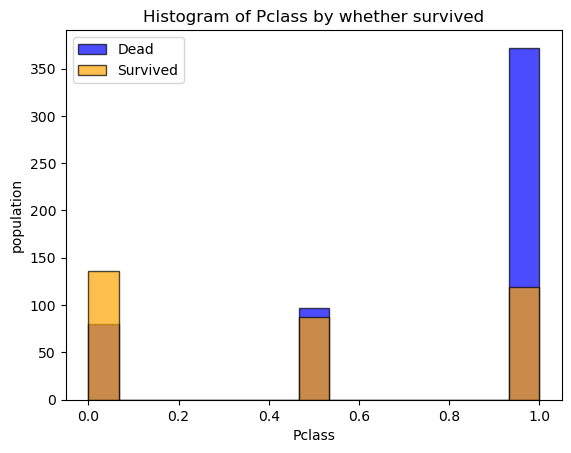

<Figure size 640x480 with 0 Axes>

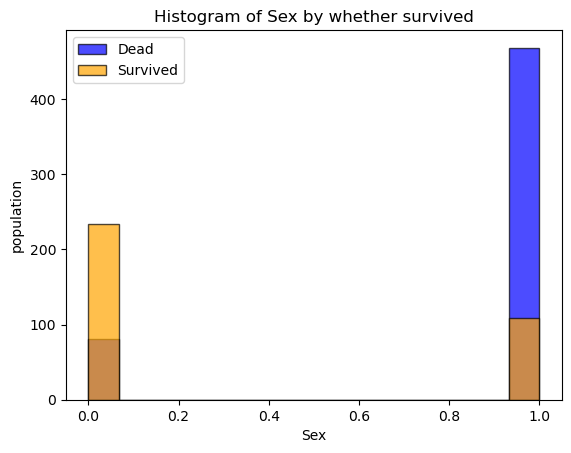

<Figure size 640x480 with 0 Axes>

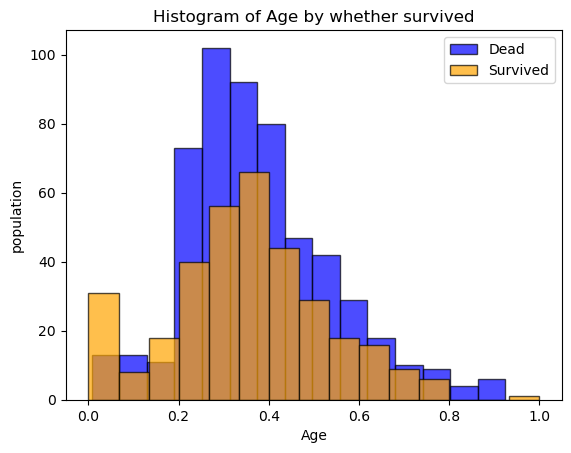

<Figure size 640x480 with 0 Axes>

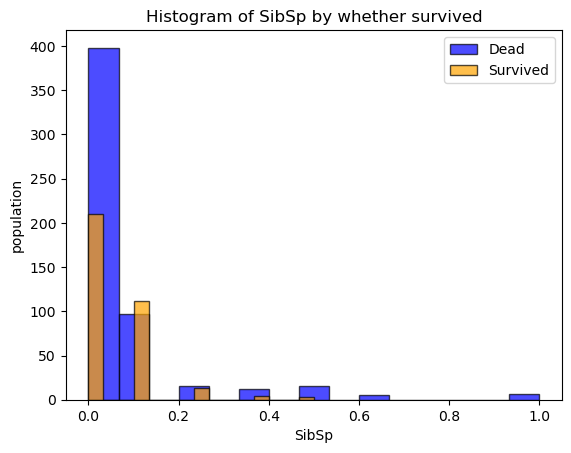

<Figure size 640x480 with 0 Axes>

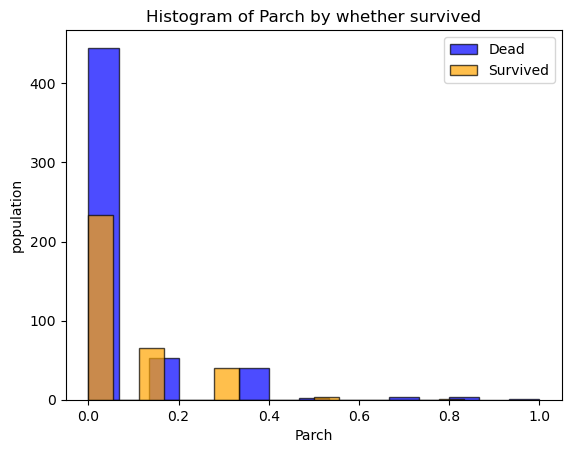

<Figure size 640x480 with 0 Axes>

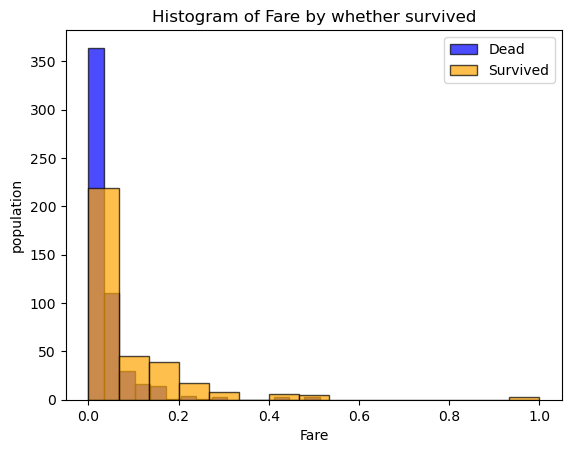

<Figure size 640x480 with 0 Axes>

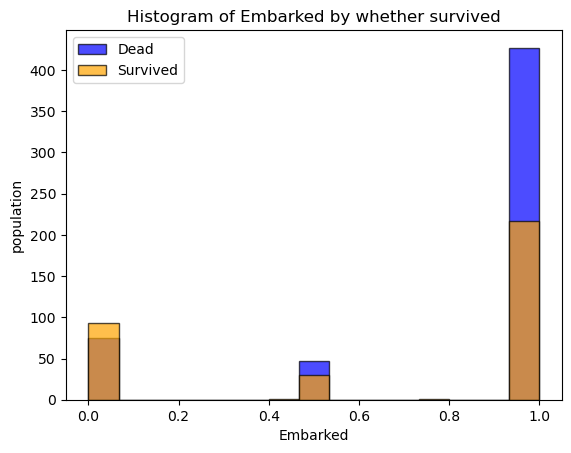

<Figure size 640x480 with 0 Axes>

In [66]:
for name in colunm_names:
    plt.figure()
    data = pd.DataFrame({
        "name": train_DataFrame_filled[name],
        "target": train_DataFrame_filled["Survived"]
    })

    plt.hist(data[data['target'] == 0]["name"], bins=15, alpha=0.7, label='Dead', color='blue', edgecolor='black')
    plt.hist(data[data['target'] == 1]["name"], bins=15, alpha=0.7, label='Survived', color='orange', edgecolor='black')

    plt.title('Histogram of ' + name + ' by whether survived')
    plt.xlabel(name)
    plt.ylabel('population')
    plt.legend()
    plt.show()
    plt.savefig("Picture/Titanic/" + name + ".png")


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [68]:
SVM_model = SVC(kernel='rbf', C=1.0, probability=True, class_weight='balanced', 
                tol=1e-3, max_iter=-1)
print("Start training...")
SVM_model.fit(train_dataset, train_label)
print("Done!")

Start training...
Done!


In [69]:
label_pred = SVM_model.predict(test_dataset)

# 计算准确率
accuracy = accuracy_score(test_label, label_pred)
print(f"Accuracy: {accuracy:.2f}")

# 打印分类报告
print("Classification Report:")
print(classification_report(test_label, label_pred))

# 打印混淆矩阵
print("Confusion Matrix:")
print(confusion_matrix(test_label, label_pred))

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       266
           1       0.97      0.97      0.97       152

    accuracy                           0.98       418
   macro avg       0.98      0.98      0.98       418
weighted avg       0.98      0.98      0.98       418

Confusion Matrix:
[[262   4]
 [  5 147]]
